# Your info

Full name: Niki Nezakati

Student ID: 98522094

# Q1. Kohonen

In [1]:
# Q1_graded
# Do not change the above line.

import matplotlib.pylab as plt
import numpy as np
import gzip
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import tensorflow as tf
import random

Importing the dataset

In [2]:
# Q1_graded
# Do not change the above line.

# Type your code here
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
unique, counts = np.unique(y_train, return_counts=True)
#How many of each number we have
result = np.column_stack((unique, counts)) 

#Creating a dictionary for keeping track of our numbers
mnist_dict = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

for i in range(len(y_train)):
    mnist_dict[y_train[i]].append(i)

#We want 5000 numbers so we pick 500 of each number
numbers = []
for i in range(10):
    numbers += random.sample(mnist_dict[i], 500)

x_train = x_train[numbers].reshape(5000,-1)
print(x_train.shape)


11501568/11490434 [==============================] - 0s 0us/step
(5000, 784)


Training the Kohonen Model

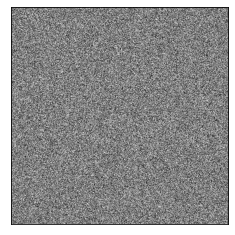

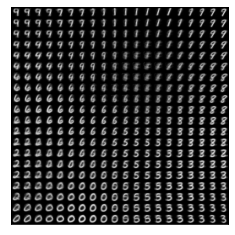

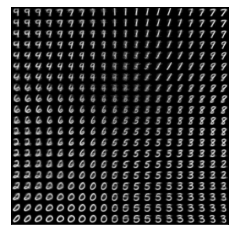

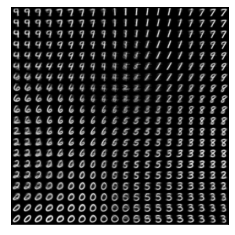

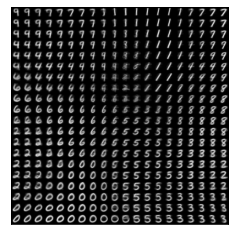

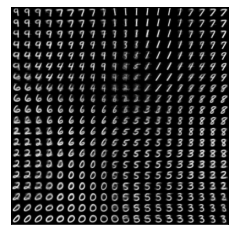

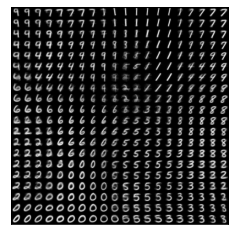

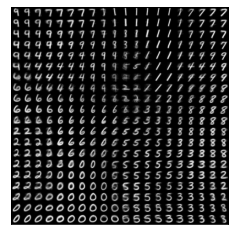

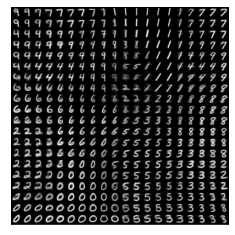

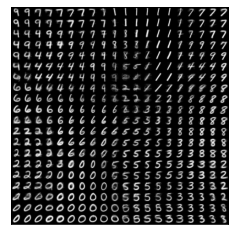

In [3]:
# Q1_graded
# Do not change the above line.

# Type your code here

#Setting the parameters
np.random.seed(0)

learning_rate = 0.1
epochs = 100
radius = 1


grid_shape = (20,20)
neurons = 400
size = int(np.sqrt(neurons))

weights = np.random.rand(neurons, 784) 

def get_distance(x, index):
    i,j = np.indices(x, sparse=True)
    return np.sqrt((i-index[0])**2 + (j-index[1])**2)

def convert_shape(x):
    i = (int)(x/size)
    j = x % size
    return i, j

def plot_numbers(weights):
    grid = np.zeros((20 * 28, 20 * 28))
    for i in range(len(weights)):
        image = weights[i].reshape(28, 28)
        grid[(i // 20) * 28: ((i // 20) + 1) * 28,
        (i % 20) * 28: ((i % 20) + 1) * 28] = image

    plt.xticks([])
    plt.yticks([])  
    plt.imshow(grid, cmap="gray")
    plt.show()    

for epoch in range(epochs):
  if epoch%10 == 0:
      plot_numbers(weights) 

  for num in range(10):

      batch = x_train[np.random.choice(len(x_train), size=128, replace=False)]
      
      for data in batch:
          # Find the Best Matching Unit (BMU) by their Euclidean distances
          BMU = np.argmin(np.sum((weights - data) ** 2, axis=1))  
          #1D -> 2D
          BMU_index = convert_shape(BMU)
          #Compute distance to BMU
          distances = get_distance(grid_shape, BMU_index)  
          #Flatten
          distances = distances.reshape(-1, 1)  
          distances = (-1 / (2 * radius ** 2)) * distances
          #Neighbourhood function
          Neighbourhood = np.exp(distances)  
          #Upadting weights
          weights = weights + learning_rate * (Neighbourhood * (data - weights))
  learning_rate *= 0.99        
  radius *= 0.99



# Q4. RBF



# 4.1.MLP

In [4]:
# Q4_graded
# Do not change the above line.

# Type your code here
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
import random
from sklearn.model_selection import train_test_split

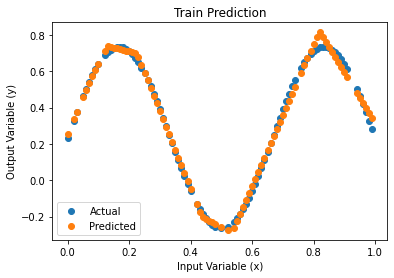

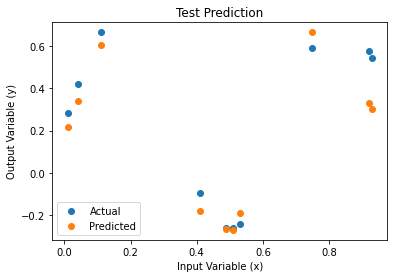

In [11]:
# Q4_graded
# Do not change the above line.

# Type your code here
pi=math.pi
i = 0
MU=np.random.uniform(low=-0.7, high=0.7, size=(1,))
a = []


while(i < 1):
  a.append(i)
  i += 0.01

  
_x = asarray(a) 
random.shuffle(_x)

_x1, _x2  = train_test_split(_x, test_size=0.1)    

_y1 = asarray([1/3+0.5*math.sin(3*i*pi)+MU for i in _x1])
_y2 = asarray([1/3+0.5*math.sin(3*i*pi)+MU for i in _x2])


_x1 = _x1.reshape((len(_x1), 1))
_x2 = _x2.reshape((len(_x2), 1))
_y1 = _y1.reshape((len(_y1), 1))
_y2 = _y2.reshape((len(_y2), 1))

scale_x1 = MinMaxScaler()
x_train = scale_x1.fit_transform(_x1)

scale_x2 = MinMaxScaler()
x_test = scale_x2.fit_transform(_x2)

scale_y1 = MinMaxScaler()
y_train = scale_y1.fit_transform(_y1)

scale_y2 = MinMaxScaler()
y_test = scale_y2.fit_transform(_y2)


model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=10000, batch_size=10, verbose=0)

yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

x_train_plot = scale_x1.inverse_transform(x_train)
x_test_plot = scale_x2.inverse_transform(x_test)

y_train_plot = scale_y1.inverse_transform(y_train)
y_test_plot = scale_y2.inverse_transform(y_test)

yhat_plot_train = scale_y1.inverse_transform(yhat_train)
yhat_plot_test = scale_y2.inverse_transform(yhat_test)


pyplot.scatter(x_train_plot,y_train_plot, label='Actual')
pyplot.scatter(x_train_plot,yhat_plot_train, label='Predicted')
pyplot.title('Train Prediction')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

pyplot.scatter(x_test_plot,y_test_plot, label='Actual')
pyplot.scatter(x_test_plot,yhat_plot_test, label='Predicted')
pyplot.title('Test Prediction')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()



# 4.2. RBF

4.2.1 K-Means

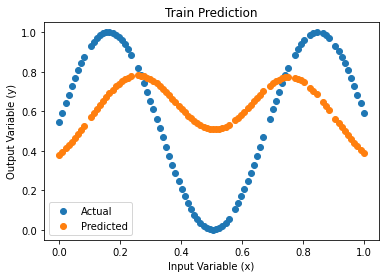

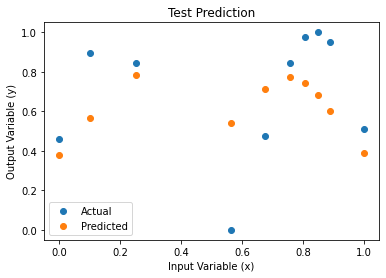

In [6]:
# Q4_graded
# Do not change the above line.

# Type your code here
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
import numpy as np

def rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

def kmeans(X, k):
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
        closestCluster = np.argmin(distances, axis=1)
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)
    clustersWithNoPoints = []

    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))
    return clusters, stds


class RBFN(object):
    def __init__(self, k=2, lr=0.01, epochs=10000, rbf=rbf, inferStds=True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)


    def fit(self, X, y):
      if self.inferStds:
        self.centers, self.stds = kmeans(X, self.k)
      else:
        self.centers, _ = kmeans(X, self.k)
        dMax = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
        self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)

      for epoch in range(self.epochs):
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
            F = a.T.dot(self.w) + self.b
            loss = (y[i] - F).flatten() ** 2
            error = -(y[i] - F).flatten()
            self.w = self.w - self.lr * a * error
            self.b = self.b - self.lr * error

    def predict(self, X):
      y_pred = []
      for i in range(X.shape[0]):
        a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
        F = a.T.dot(self.w) + self.b
        y_pred.append(F)
      return np.array(y_pred)

if __name__ == '__main__':

  pi=math.pi
  i = 0
  MU=np.random.uniform(low=-0.7, high=0.7, size=(1,))
  a = []


  while(i < 1):
    a.append(i)
    i += 0.01

    
  x = asarray(a) 
  random.shuffle(x)

  x1, x2  = train_test_split(x, test_size=0.1)    

  y1 = asarray([1/3+0.5*math.sin(3*i*pi)+MU for i in x1])
  y2 = asarray([1/3+0.5*math.sin(3*i*pi)+MU for i in x2])


  x1 = x1.reshape((len(x1), 1))
  x2 = x2.reshape((len(x2), 1))
  y1 = y1.reshape((len(y1), 1))
  y2 = y2.reshape((len(y2), 1))

  scale_x1 = MinMaxScaler()
  x1 = scale_x1.fit_transform(x1)

  scale_x2 = MinMaxScaler()
  x2 = scale_x2.fit_transform(x2)

  scale_y1 = MinMaxScaler()
  y1 = scale_y1.fit_transform(y1)

  scale_y2 = MinMaxScaler()
  y2 = scale_y2.fit_transform(y2)

  rbfn = RBFN(lr=1e-2, k=2)
  rbfn.fit(x1, y1)

  y_pred1 = rbfn.predict(x1)
  y_pred1 = y_pred1[:, :, :1]

  y_pred2 = rbfn.predict(x2)
  y_pred2 = y_pred2[:, :, :1]


  pyplot.scatter(x1,y1, label='Actual')
  pyplot.scatter(x1,y_pred1, label='Predicted')
  pyplot.title('Train Prediction')
  pyplot.xlabel('Input Variable (x)')
  pyplot.ylabel('Output Variable (y)')
  pyplot.legend()
  pyplot.show()


  pyplot.scatter(x2,y2, label='Actual')
  pyplot.scatter(x2,y_pred2, label='Predicted')
  pyplot.title('Test Prediction')
  pyplot.xlabel('Input Variable (x)')
  pyplot.ylabel('Output Variable (y)')
  pyplot.legend()
  pyplot.show()

4.2.2 GMM

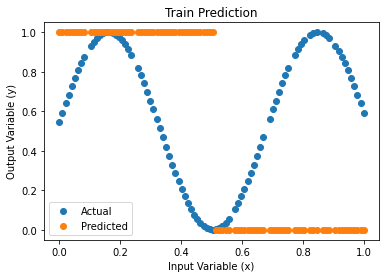

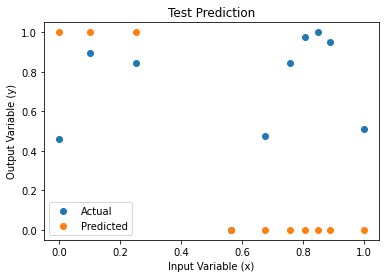

In [7]:
# Q4_graded
# Do not change the above line.

# Type your code here
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

# define the model
gmm = GaussianMixture(n_components=2)
# train the model
gmm.fit(x1)
# assign each data point to a cluster
gresult_train = gmm.predict(x1)
gresult_test = gmm.predict(x2)


pyplot.scatter(x1,y1, label='Actual')
pyplot.scatter(x1,gresult_train, label='Predicted')
pyplot.title('Train Prediction')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

pyplot.scatter(x2,y2, label='Actual')
pyplot.scatter(x2,gresult_test, label='Predicted')
pyplot.title('Test Prediction')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

4.2.3 Random (BIRCH)

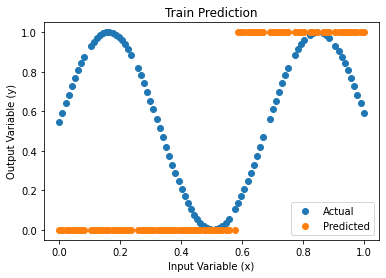

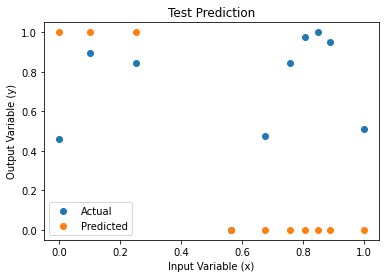

In [8]:
# Q4_graded
# Do not change the above line.

# Type your code here

from sklearn.cluster import Birch

# define the model
birch_model = Birch(threshold=0.03, n_clusters=2)

# train the model
birch_model.fit(x1)

# assign each data point to a cluster
birch_result_train = birch_model.predict(x1)
birch_result_test = birch_model.fit_predict(x2)

pyplot.scatter(x1,y1, label='Actual')
pyplot.scatter(x1,birch_result_train, label='Predicted')
pyplot.title('Train Prediction')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

pyplot.scatter(x2,y2, label='Actual')
pyplot.scatter(x2,birch_result_test, label='Predicted')
pyplot.title('Test Prediction')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

# 4.3. Analysis

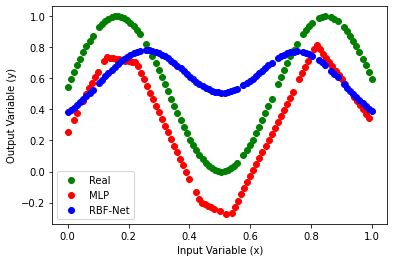

In [12]:
# Q4_graded
# Do not change the above line.

# Type your code here

pyplot.scatter(x1, y1,c='g',label='Real')
pyplot.scatter(x_train_plot, yhat_plot_train, c='r',label='MLP')
pyplot.scatter(x1,y_pred1, c='b',label='RBF-Net')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/bdpVdvr/image.png)
  
    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI002_HW2.ipynb`
    - `Q1.py`
    - `Q4.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.